# Central Limit Theorem and Advanced Topics

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm 
import scipy.stats

In [14]:
# read in data
df = pd.read_csv('california_housing_train.csv')

In [15]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [16]:
# select 'households' as the population of interest
population = df.households

In [17]:
# total number of datapoints in population
len(df)

20640

In [18]:
# population mean
population.mean()

499.5396802325581

<AxesSubplot:xlabel='households', ylabel='Count'>

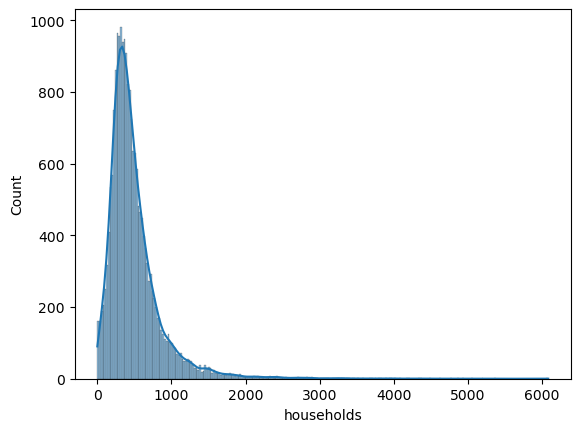

In [19]:
# population distribution
sns.histplot(population, kde=True)

In [20]:
def sample_means(population, samples, n):
    """Draw random samples from the population and calculate the sample means."""
    result = []
    for i in range(samples):
        sample = np.random.choice(population, size=n, replace=False)
        sample_mean = sample.mean()
        result.append(sample_mean)
    return result

def plot_hist_and_qq(means):
    """Plot histogram and QQ-plot."""
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,5))
    sns.histplot(means, kde=True, ax=axes[0])
    axes[1] = sm.qqplot(np.array(means), line='s', ax=axes[1])
    plt.show()

In [21]:
# let's assume we draw 1000 samples of varying size n from the population
num_samples = 1000

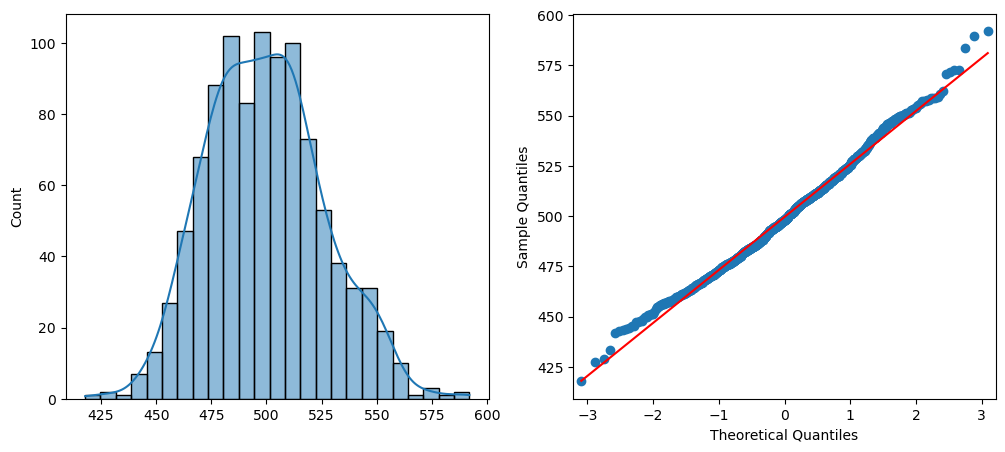

In [22]:
# sample size = 200 - enough sample size, the distribution is close to normal
n = 200
result = sample_means(population, samples=num_samples, n=n)
plot_hist_and_qq(result)

### Confidence Interval

The formula used to construct a confidence interval is: <br><br>
$ \overline{x_{n}}\pm t\frac{S}{\sqrt{n}} $

$\overline{x_{n}}$ = sample mean <br>
$t$ = t value <br>
$S$ = sample standard deviation <br>
$n$ = number of samples <br>

In [23]:
x_bar = np.mean(result)
s = np.std(result)
t = scipy.stats.t.ppf(0.975, n-1)

In [24]:
lower_bound = x_bar - t*s/np.sqrt(n)
upper_bound = x_bar + t*s/np.sqrt(n)

lower_bound, upper_bound

(495.86199489913025, 503.2190451008698)

# CLT is robust to different distributions

In [25]:
# generate different distributions
size = 10000

distributions = {
    "uniform": np.random.uniform(0, 10, size),
    "poisson": np.random.poisson(5, size),
    "exponential": np.random.exponential(5, size),
    "crazy distribution": np.append(np.random.normal(40,10, 7000), np.random.exponential(7, 3000))}

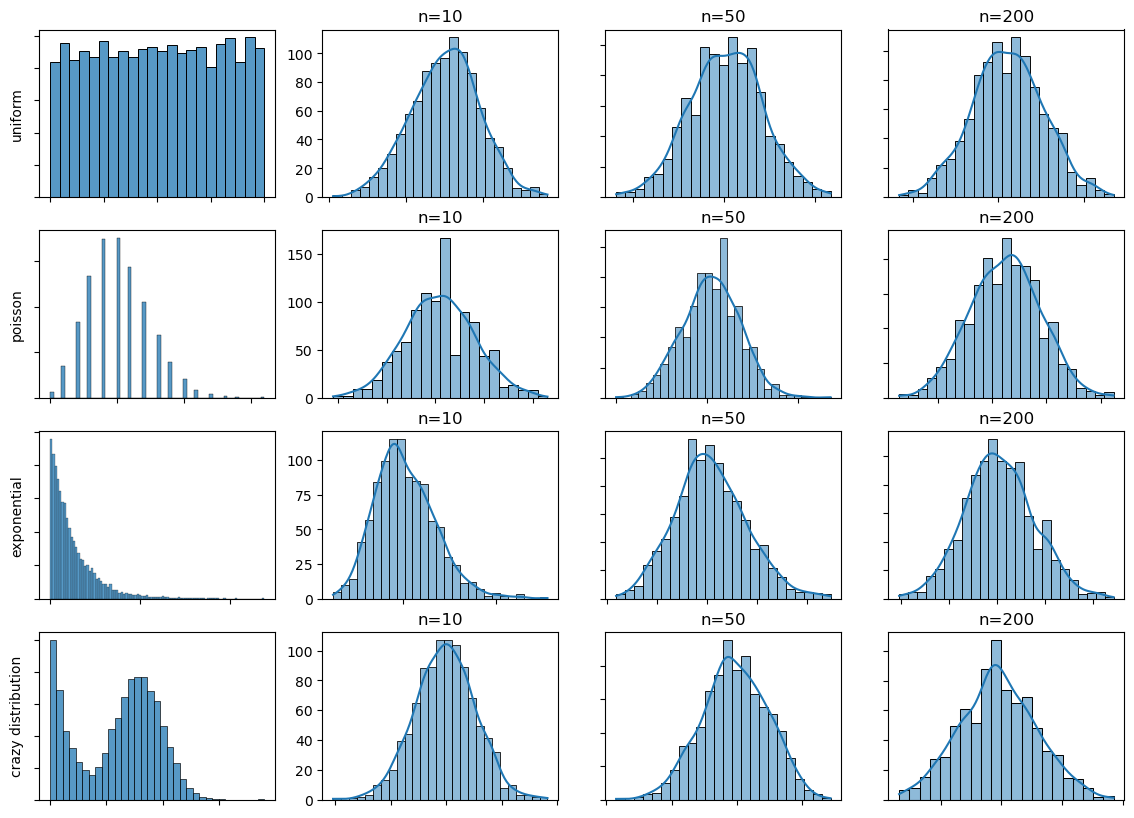

In [26]:
# plot results
fig, ax = plt.subplots(nrows=4, ncols=4, figsize=(14,10))
for i, (name, dist) in enumerate(distributions.items()):
    g1 = sns.histplot(dist, ax=ax[i, 0])
    g1.set(ylabel=name, yticklabels=[], xticklabels=[])
    means = sample_means(dist, 1000, 10)
    g2 = sns.histplot(means, kde=True, ax=ax[i, 1])
    g2.set(title="n=10", ylabel='', xticklabels=[])
    means = sample_means(dist, 1000, 50)
    g3 = sns.histplot(means, kde=True, ax=ax[i, 2])
    g3.set(title="n=50", ylabel='', yticklabels=[], xticklabels=[])
    means = sample_means(dist, 1000, 200)
    g4 = sns.histplot(means, kde=True, ax=ax[i, 3])
    g4.set(title="n=200", ylabel='', yticklabels=[], xticklabels=[])



# CLT Assumptions
- Random & Independent Samples
- Sufficiently Large Sample Size

## Random & Independent samples

In [27]:
def dependent_sample_means(population, samples, n):
    """Dependent sampling where each sample cannot be greater than the previous sample by more than 5 times."""
    result = []
    for i in range(samples):
        sample = []
        prev = 10000
        for j in range(n):
            ind_sample = np.random.choice(population[(population<prev*5)], size=1, replace=False)
            sample.extend(ind_sample)
            prev = ind_sample[0]
        sample_mean = np.array(sample).mean()
        result.append(sample_mean)
    return result

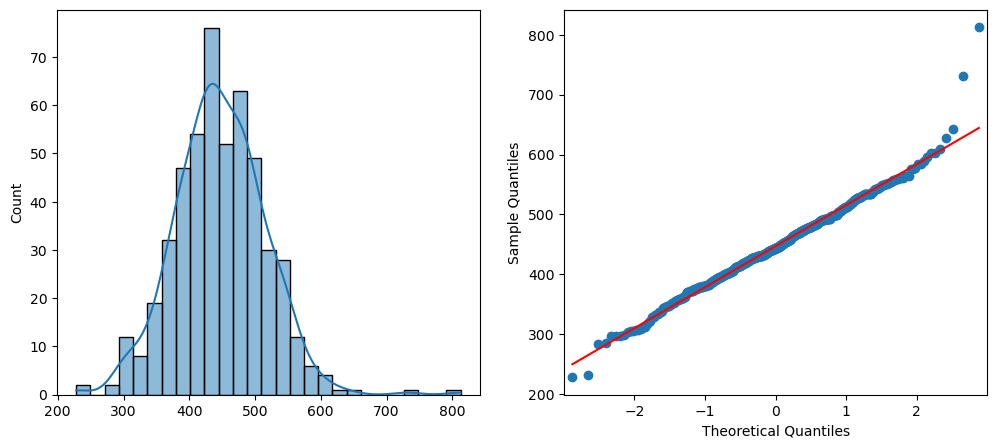

In [28]:
# dependent sample

# draw samples in such a way that each sample cannot be 5x greater than the previous sample
result = dependent_sample_means(df.households, 500, 30)
plot_hist_and_qq(result)

## Sample Size

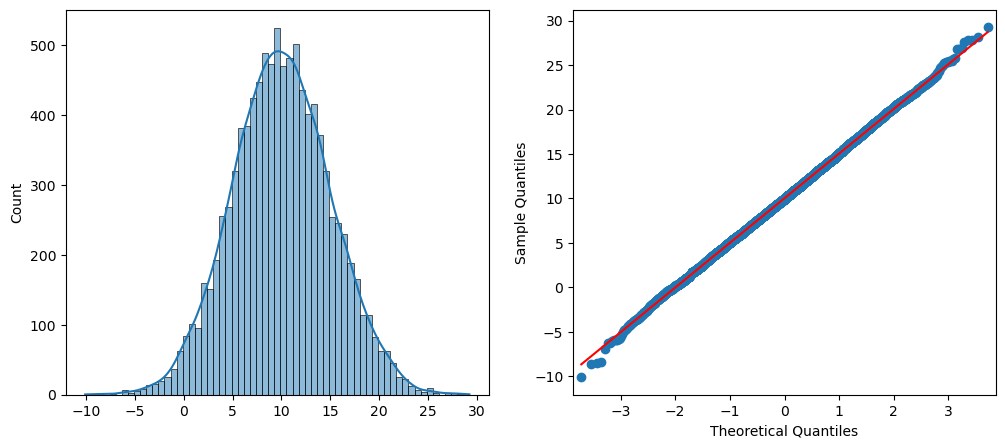

In [29]:
# create a normally distributed population
mean = 10
std = 5
population = np.random.normal(loc=mean, scale=std, size=10000)
plot_hist_and_qq(population)

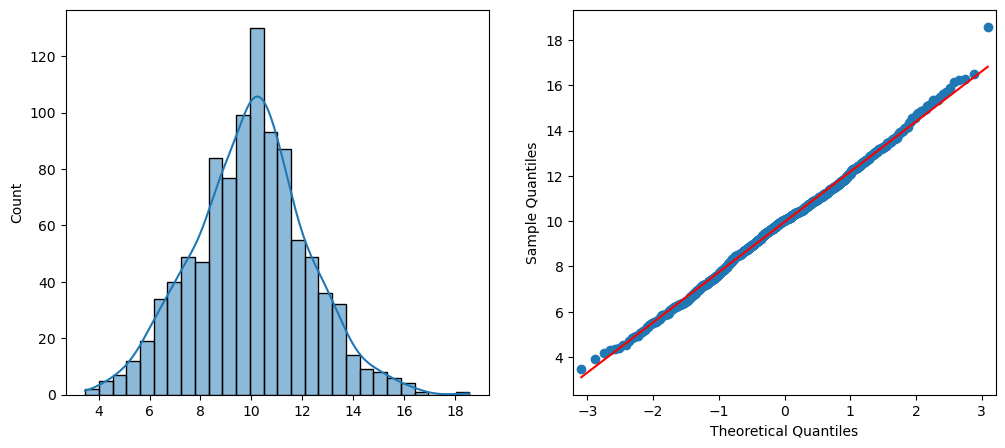

In [30]:
n = 5
result = sample_means(population, samples=1000, n=n)
plot_hist_and_qq(result)

If the underlying population distribution is normal, then even a very small sample size will be enough for the Central Limit Theorem to hold.

[Text(0.5, 1.0, 'n=100'),
 Text(0, 0.5, ''),
 [Text(0, 0.0, ''),
  Text(0, 20.0, ''),
  Text(0, 40.0, ''),
  Text(0, 60.0, ''),
  Text(0, 80.0, ''),
  Text(0, 100.0, ''),
  Text(0, 120.0, '')],
 [Text(0.9998600000000001, 0, ''),
  Text(0.9998800000000001, 0, ''),
  Text(0.9999000000000001, 0, ''),
  Text(0.99992, 0, ''),
  Text(0.99994, 0, '')]]

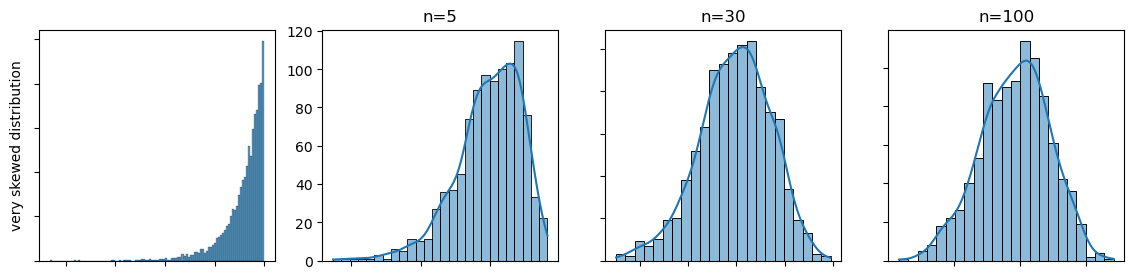

In [31]:
# a heavily skewed population distribution
skewed_dist = np.random.power(10000, size)

# plot
fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(14,3))
g1 = sns.histplot(skewed_dist, ax=ax[0])
g1.set(ylabel='very skewed distribution', yticklabels=[], xticklabels=[])
means = sample_means(skewed_dist, 1000, 5)
g2 = sns.histplot(means, kde=True, ax=ax[1])
g2.set(title="n=5", ylabel='', xticklabels=[])
means = sample_means(skewed_dist, 1000, 30)
g3 = sns.histplot(means, kde=True, ax=ax[2])
g3.set(title="n=30", ylabel='', yticklabels=[], xticklabels=[])
means = sample_means(skewed_dist, 1000, 100)
g4 = sns.histplot(means, kde=True, ax=ax[3])
g4.set(title="n=100", ylabel='', yticklabels=[], xticklabels=[])

If the underlying population distribution is skewed, then we need a larger sample size for the Central Limit Theorem to hold.